<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#эффективность-обогащения" data-toc-modified-id="эффективность-обогащения-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>эффективность обогащения</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Посмотрите,-как-меняется-концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах:-в-сырье,-в-черновом-концентрате,-в-концентрате-после-первой-очистки-и-в-финальном-концентрате." data-toc-modified-id="Посмотрите,-как-меняется-концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах:-в-сырье,-в-черновом-концентрате,-в-концентрате-после-первой-очистки-и-в-финальном-концентрате.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате.</a></span></li><li><span><a href="#Сравните-распределения-размеров-гранул-исходного-сырья-на-обучающей-и-тестовой-выборках.-Если-распределения-сильно-отличаются-друг-от-друга,-оценка-модели-будет-неправильной." data-toc-modified-id="Сравните-распределения-размеров-гранул-исходного-сырья-на-обучающей-и-тестовой-выборках.-Если-распределения-сильно-отличаются-друг-от-друга,-оценка-модели-будет-неправильной.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравните распределения размеров гранул исходного сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.</a></span></li><li><span><a href="#Исследуйте-суммарную-концентрацию-металлов-на-разных-стадиях:-в-сырье,-в-черновом-концентрате,-в-концентрате-после-первой-очистки-и-в-финальном-концентрате." data-toc-modified-id="Исследуйте-суммарную-концентрацию-металлов-на-разных-стадиях:-в-сырье,-в-черновом-концентрате,-в-концентрате-после-первой-очистки-и-в-финальном-концентрате.-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследуйте суммарную концентрацию металлов на разных стадиях: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате.</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Напишите-функцию-для-вычисления-итоговой-sMAPE." data-toc-modified-id="Напишите-функцию-для-вычисления-итоговой-sMAPE.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Напишите функцию для вычисления итоговой sMAPE.</a></span></li><li><span><a href="#Обучите-разные-модели-и-оцените-их-качество-кросс-валидацией.-Выберите-лучшую-модель-и-проверьте-её-на-тестовой-выборке.-Опишите-выводы." data-toc-modified-id="Обучите-разные-модели-и-оцените-их-качество-кросс-валидацией.-Выберите-лучшую-модель-и-проверьте-её-на-тестовой-выборке.-Опишите-выводы.-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучите разные модели и оцените их качество кросс-валидацией. Выберите лучшую модель и проверьте её на тестовой выборке. Опишите выводы.</a></span></li></ul></li></ul></div>

# Восстановление золота из руды

## Подготовка данных

В данном проекте необходимо найти решение для компании "Цифры" для эффектианой работы предприятия. Цель проекта: предсказать коэффициент восстановления золота из золотосодержащей руды для безубыточной работы предприятия

In [1]:
import pandas as pd

import numpy as np
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import  make_scorer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.dummy import DummyRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
gold_industry_train = pd.read_csv('/datasets/gold_industry_train.csv')
gold_industry_test = pd.read_csv('/datasets/gold_industry_test.csv')
gold_industry_full = pd.read_csv('/datasets/gold_industry_full.csv')

In [3]:
gold_industry_train.duplicated().sum()

0

In [4]:
gold_industry_test.duplicated().sum()

0

In [5]:
gold_industry_train.describe()

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
count,14579.000000,14579.000000,14507.000000,14502.000000,14572.000000,14478.000000,14548.000000,14572.000000,14579.000000,14579.000000,...,13659.000000,14579.000000,14578.000000,14578.000000,14387.000000,14579.000000,14579.000000,14578.000000,14504.000000,14574.000000
mean,8.352941,8.877460,3.604221,36.561420,474.332784,58.922712,12.427399,5.994854,1104.208278,-379.367166,...,7.111347,43.979499,5.192145,9.923809,9.566676,66.759066,3.087939,9.731972,2.719985,10.612745
std,1.934376,1.922536,1.056063,5.209823,108.503552,22.407410,3.428939,1.152873,162.235606,94.652311,...,3.909951,5.471437,1.388014,1.706976,2.805654,10.619709,0.915187,2.358143,0.958929,2.871075
min,0.010000,0.010000,0.010000,0.010000,0.002986,0.049194,0.001083,0.000568,-0.042069,-657.949759,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.932996,7.341922,2.880490,34.093951,411.048483,47.278490,10.002832,5.304167,999.644856,-499.861797,...,3.784897,43.345906,4.283347,9.103183,7.860030,63.114596,2.505287,8.088928,2.036512,9.013412
50%,8.225284,8.715859,3.532399,37.097511,498.187968,54.361187,12.003320,6.003053,1000.982624,-300.314199,...,7.629968,44.975014,5.118647,10.046455,9.301970,67.962788,3.029238,9.818512,2.774847,10.670515
75%,9.832210,10.255843,4.257282,39.899799,549.586552,64.464926,14.929903,6.796632,1292.663971,-299.989315,...,10.367050,46.275153,5.925380,10.981203,11.001573,72.598187,3.614098,11.169187,3.353845,12.130827
max,13.731330,14.596026,7.052325,53.475325,717.508837,484.967466,36.118275,9.703448,1512.299531,-273.776101,...,26.000772,52.756638,16.001945,16.705297,19.423912,100.000000,8.245022,19.552149,5.804178,22.317730


In [6]:
gold_industry_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14579 non-null  object 
 1   rougher.input.feed_au                               14579 non-null  float64
 2   rougher.input.feed_ag                               14579 non-null  float64
 3   rougher.input.feed_pb                               14507 non-null  float64
 4   rougher.input.feed_sol                              14502 non-null  float64
 5   rougher.input.feed_rate                             14572 non-null  float64
 6   rougher.input.feed_size                             14478 non-null  float64
 7   rougher.input.floatbank10_sulfate                   14548 non-null  float64
 8   rougher.input.floatbank10_xanthate                  14572 non-null  float64


In [7]:
gold_industry_train['rougher.output.recovery']

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14574    87.684717
14575    90.677361
14576    89.574376
14577    87.724007
14578    88.890579
Name: rougher.output.recovery, Length: 14579, dtype: float64

In [8]:
gold_industry_full.shape

(19439, 87)

In [9]:
gold_industry_train.shape

(14579, 87)

In [10]:
gold_industry_test.shape

(4860, 53)

In [11]:
gold_industry_train.isna().sum()

date                       0
rougher.input.feed_au      0
rougher.input.feed_ag      0
rougher.input.feed_pb     72
rougher.input.feed_sol    77
                          ..
final.output.recovery      0
final.output.tail_au       0
final.output.tail_ag       1
final.output.tail_pb      75
final.output.tail_sol      5
Length: 87, dtype: int64

In [12]:
(gold_industry_test.isna().sum()/len(gold_industry_test)).sum()

0.0771604938271605

удалим все пропуски в тестовой выборке.В обучающей выборке мы не можем их удалить, так как завысим метрики, заполним эти значения

In [13]:
gold_industry_test = gold_industry_test.dropna()

In [14]:
gold_industry_test.shape

(4537, 53)

In [15]:
gold_industry_train = gold_industry_train.fillna(method = 'ffill', axis=0)

In [16]:
sum(gold_industry_train.isna().sum())

0

###  эффективность обогащения

вычислим эффективность обогащения руды на этапе флотации

In [17]:
gold_industry_train['rougher.output.recovery']

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14574    87.684717
14575    90.677361
14576    89.574376
14577    87.724007
14578    88.890579
Name: rougher.output.recovery, Length: 14579, dtype: float64

In [18]:
culc = (gold_industry_train['rougher.output.concentrate_au'] *(gold_industry_train['rougher.input.feed_au'] 
                                                        - gold_industry_train['rougher.output.tail_au']))\
                                                        /(gold_industry_train['rougher.input.feed_au'] *
                                                        (gold_industry_train['rougher.output.concentrate_au']
                                                         - gold_industry_train['rougher.output.tail_au']))*100



In [19]:
culc

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14574    87.684717
14575    90.677361
14576    89.574376
14577    87.724007
14578    88.890579
Length: 14579, dtype: float64

In [20]:
mean_absolute_error(gold_industry_train['rougher.output.recovery'],culc)

9.83758577644259e-15

расхождение оказалось малым

In [21]:
~gold_industry_train.columns.isin(gold_industry_test.columns)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [22]:
gold_industry_train.columns.difference(gold_industry_test.columns)

Index(['final.output.concentrate_ag', 'final.output.concentrate_au',
       'final.output.concentrate_pb', 'final.output.concentrate_sol',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_au',
       'final.output.tail_pb', 'final.output.tail_sol',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au',
       'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol',
       'rougher.calculation.au_pb_ratio',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.output.concentrate_ag', 'rougher.output.concentrate_au',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'roughe

показаны столбцы, которых нет в тестовой выборке. В данный список вошли данные по концентрации веществ после каждого этапа очистки и таргет,эти данные оказались недоступны в тестовой выборке, так как  большая вероятность неточности в измерениях

## Анализ данных

### Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате.

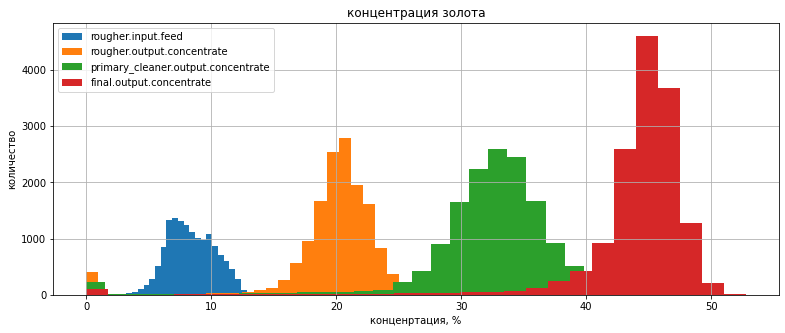

In [23]:
plt.figure(figsize=(13,5))
gold_industry_train['rougher.input.feed_au'].hist(bins=30, label='rougher.input.feed')
gold_industry_train['rougher.output.concentrate_au'].hist(bins=30, label='rougher.output.concentrate')
gold_industry_train['primary_cleaner.output.concentrate_au'].hist(bins=30,label='primary_cleaner.output.concentrate')
gold_industry_train['final.output.concentrate_au'].hist(bins=30,label='final.output.concentrate')
plt.legend()
plt.xlabel('конценртация, %')
plt.ylabel('количество')
plt.title('концентрация золота');






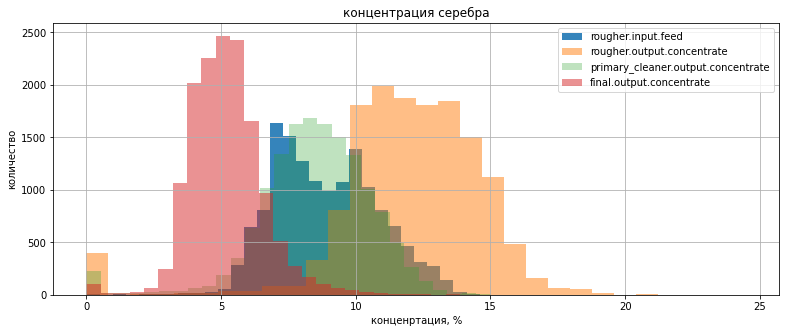

In [24]:
plt.figure(figsize=(13,5))
gold_industry_train['rougher.input.feed_ag'].hist(bins=30, label='rougher.input.feed',alpha=0.9)
gold_industry_train['rougher.output.concentrate_ag'].hist(bins=30, label='rougher.output.concentrate',alpha=0.5)
gold_industry_train['primary_cleaner.output.concentrate_ag'].hist(bins=30,label='primary_cleaner.output.concentrate',alpha=0.3)
gold_industry_train['final.output.concentrate_ag'].hist(bins=30,label='final.output.concentrate',alpha=0.5)
plt.legend()
plt.xlabel('конценртация, %')
plt.ylabel('количество')
plt.title('концентрация серебра');


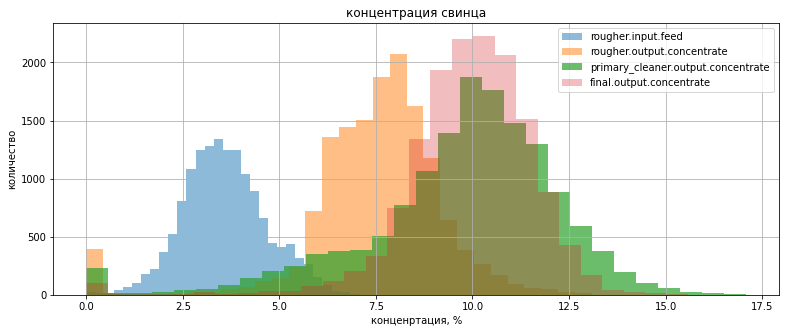

In [25]:
plt.figure(figsize=(13,5))
gold_industry_train['rougher.input.feed_pb'].hist(bins=30, label='rougher.input.feed',alpha=0.5)
gold_industry_train['rougher.output.concentrate_pb'].hist(bins=30, label='rougher.output.concentrate',alpha=0.5)
gold_industry_train['primary_cleaner.output.concentrate_pb'].hist(bins=30,label='primary_cleaner.output.concentrate',alpha=0.7)
gold_industry_train['final.output.concentrate_pb'].hist(bins=30,label='final.output.concentrate',alpha=0.3)
plt.legend()
plt.xlabel('конценртация, %')
plt.ylabel('количество')
plt.title('концентрация свинца');

после каждой операции концентрация золота увеличивается. концентрация серебра после флотации увеличилось, но после первой ступени очистки снизилось.  Концентрация свинца после флотации увеличилось,  но после очистки не изменилось 

### Сравните распределения размеров гранул исходного сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.


изобразим плотность вероятности размеров гранул на обучающей и тестовой выборках

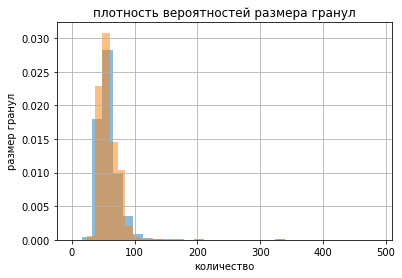

In [26]:
gold_industry_train['rougher.input.feed_size'].hist(bins=30,density=True, label='Train',alpha=0.5)
gold_industry_test['rougher.input.feed_size'].hist(bins=30,density=True,label='Test',alpha=0.5)
plt.ylabel('размер гранул')
plt.xlabel('количество')
plt.title('плотность вероятностей размера гранул');

размеры гранул в выборках очень близки

###  Исследуйте суммарную концентрацию металлов на разных стадиях: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате.

для исследования суммарной концентрации металлов изучим аномалии

In [27]:
gold_industry_full['rougher_sum'] = gold_industry_train['rougher.input.feed_pb']+\
                          gold_industry_train['rougher.input.feed_au']+\
                          gold_industry_train['rougher.input.feed_ag']+\
                          gold_industry_train['rougher.input.feed_sol']

In [28]:
gold_industry_full['rougher_concentrate_sum'] = gold_industry_train['rougher.output.concentrate_pb']+\
                          gold_industry_train['rougher.output.concentrate_au']+\
                          gold_industry_train['rougher.output.concentrate_ag']+\
                          gold_industry_train['rougher.output.concentrate_sol']

In [29]:
gold_industry_full['primary_cleaner_concentrate_sum'] = gold_industry_train['primary_cleaner.output.concentrate_ag']+\
                                  gold_industry_train['primary_cleaner.output.concentrate_pb']+\
                                  gold_industry_train['primary_cleaner.output.concentrate_au']+\
                                  gold_industry_train['primary_cleaner.output.concentrate_sol']

In [30]:
gold_industry_full['final_concentrate_sum'] = gold_industry_train['final.output.concentrate_au']+\
                        gold_industry_train['final.output.concentrate_pb']+\
                        gold_industry_train['final.output.concentrate_ag']+\
                        gold_industry_train['final.output.concentrate_sol']

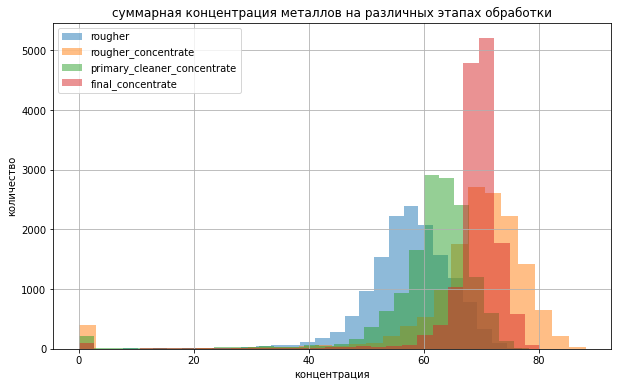

In [31]:
plt.figure(figsize=(10,6))
gold_industry_full['rougher_sum'].hist(bins=30, label='rougher',alpha=0.5)
gold_industry_full['rougher_concentrate_sum'].hist(bins=30, label='rougher_concentrate',alpha=0.5)
gold_industry_full['primary_cleaner_concentrate_sum'].hist(bins=30, label='primary_cleaner_concentrate',alpha=0.5)
gold_industry_full['final_concentrate_sum'].hist(bins=30, label='final_concentrate',alpha=0.5)
plt.xlabel('концентрация')
plt.ylabel('количество')
plt.legend()
plt.title('суммарная концентрация металлов на различных этапах обработки');

суммарная концентрация возрастает после флотации и первой очитски, но уменьшается второй очитски. видим, что присутсвтует большое количество анамалии около 0, считаю необходимым их удалить 

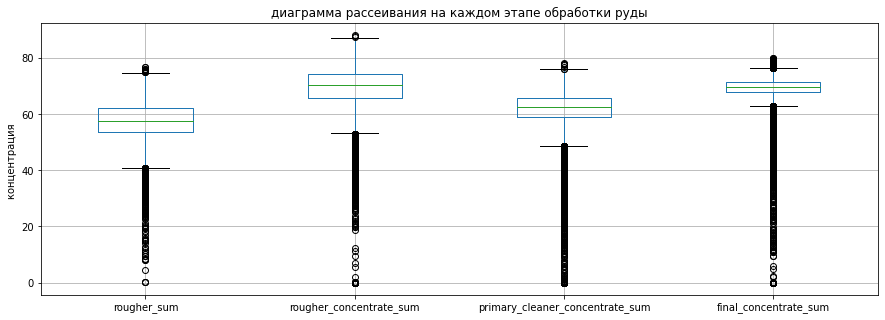

In [32]:
plt.figure(figsize=(15,5))

gold_industry_full[['rougher_sum','rougher_concentrate_sum','primary_cleaner_concentrate_sum','final_concentrate_sum']] .boxplot()
plt.title('диаграмма рассеивания на каждом этапе обработки руды')
plt.xlabel('')
plt.ylabel('концентрация ');




 видим, большое количество выбросов, удалим их из обучающей воборки

In [33]:
min_final_concentrate_sum = gold_industry_full['final_concentrate_sum'].quantile(0.25)-\
                    (gold_industry_full['final_concentrate_sum'].quantile(0.75)-\
                     gold_industry_full['final_concentrate_sum'].quantile(0.25)) *1.5
max_rougher_sum = gold_industry_full['final_concentrate_sum'].quantile(0.75)+\
                    (gold_industry_full['final_concentrate_sum'].quantile(0.75)-\
                     gold_industry_full['final_concentrate_sum'].quantile(0.25)) *1.5

In [34]:
gold_industry_train = gold_industry_train.loc[((gold_industry_train['final.output.concentrate_au']+\
                        gold_industry_train['final.output.concentrate_pb']+\
                        gold_industry_train['final.output.concentrate_ag']+\
                        gold_industry_train['final.output.concentrate_sol'])> min_final_concentrate_sum) &\
                                             ((gold_industry_train['final.output.concentrate_au']+\
                        gold_industry_train['final.output.concentrate_pb']+\
                        gold_industry_train['final.output.concentrate_ag']+\
                        gold_industry_train['final.output.concentrate_sol']) < max_rougher_sum)]

In [35]:
gold_industry_train.shape

(13514, 87)

## Модель

###  Напишите функцию для вычисления итоговой sMAPE.


In [36]:
def smape( actual, forecast):
 return 1/ len (actual) * np.sum (2 * np.abs (forecast-actual) / (np.abs (actual) + np.abs (forecast))*100)

### Обучите разные модели и оцените их качество кросс-валидацией. Выберите лучшую модель и проверьте её на тестовой выборке. Опишите выводы.

In [37]:
target_train = gold_industry_train[['rougher.output.recovery','final.output.recovery']]

In [38]:
features_train = gold_industry_train.drop(gold_industry_train.columns.difference(gold_industry_test.columns), axis=1)

In [39]:
features_train = features_train.drop(['date'], axis=1)

In [40]:
gold_industry_test_joined = gold_industry_test.merge(gold_industry_full[['rougher.output.recovery', 'final.output.recovery', 'date']],
                         how = 'inner', on= 'date')

In [41]:
target_test = gold_industry_test_joined[['rougher.output.recovery','final.output.recovery']]

In [42]:
features_test = gold_industry_test_joined.drop(['date','rougher.output.recovery','final.output.recovery'], axis=1)

In [43]:
model = LinearRegression()


In [44]:
model.fit(features_train,target_train)

LinearRegression()

In [45]:
scoring= make_scorer(smape, greater_is_better= False)

In [46]:
rougher_line_reg = cross_val_score(LinearRegression(),
     features_train,
     target_train['rougher.output.recovery'],
     scoring = scoring,
     cv=5,
     n_jobs=-1)
smape_rougher_line_reg = np.mean(abs(rougher_line_reg))
print('средня оценка smape_rougher ',smape_rougher_line_reg)

средня оценка smape_rougher  14.082640656639416


In [47]:
rougher_line_reg = cross_val_score(LinearRegression(),
     features_train,
     target_train['final.output.recovery'],
     scoring = scoring,
     cv=5,
     n_jobs=-1)
smape_final_line_reg = np.mean(abs(rougher_line_reg))
print('средня оценка smape_final ',smape_final_line_reg)

средня оценка smape_final  9.33594066434043


In [48]:
summary_smape = 0.25*smape_rougher_line_reg + 0.75*smape_final_line_reg

In [49]:
print('средняя итоговая оценка smape', summary_smape)

средняя итоговая оценка smape 10.522615662415177


Дерево решений

In [50]:
model_tree = DecisionTreeRegressor(random_state=12345)

In [51]:
model_tree

DecisionTreeRegressor(random_state=12345)

In [52]:
parametrs = {'max_depth':range(1,31,3), 'min_samples_split':range(1,5),'min_samples_leaf':range(1,5) }

In [53]:
gridsearch = RandomizedSearchCV(model_tree, parametrs, cv=5)

In [54]:
gridsearch.fit(features_train,target_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=12345),
                   param_distributions={'max_depth': range(1, 31, 3),
                                        'min_samples_leaf': range(1, 5),
                                        'min_samples_split': range(1, 5)})

In [55]:
gridsearch.best_params_

{'min_samples_split': 4, 'min_samples_leaf': 3, 'max_depth': 1}

In [56]:
best_model = DecisionTreeRegressor(max_depth = 4, min_samples_split = 2,min_samples_leaf = 2, random_state=12345)

In [57]:
rougher_tree_reg = cross_val_score(best_model,
     features_train,
     target_train['rougher.output.recovery'],
     scoring = scoring,
     cv=5,
     n_jobs=-1)
smape_rougher_tree_reg = np.mean(abs(rougher_tree_reg))
print('средня оценка smape_rougher ',smape_rougher_tree_reg)

средня оценка smape_rougher  13.651633010959236


In [58]:
rougher_tree_reg = cross_val_score(best_model,
     features_train,
     target_train['final.output.recovery'],
     scoring = scoring,
     cv=5,
     n_jobs=-1)
smape_final_tree_reg = np.mean(abs(rougher_tree_reg))
print('средня оценка smape_final ',smape_final_tree_reg)

средня оценка smape_final  9.240849642238564


In [59]:
summary_smape = 0.25*smape_rougher_tree_reg + 0.75*smape_final_tree_reg

In [60]:
print('средняя итоговая оценка smape', summary_smape)

средняя итоговая оценка smape 10.343545484418732


In [ ]:
best=100
for depth in range(1, 16, 5):
    model = RandomForestRegressor(n_estimators=50, max_depth=depth, random_state=12345)
    model.fit(features_train,target_train) 
    rougher_forrest_reg = cross_val_score(model,
     features_train,
     target_train['rougher.output.recovery'],
     scoring = scoring,
     cv=5,
     n_jobs=-1)
    smape_rougher_forrest_reg = np.mean(abs(rougher_forrest_reg))
    
    rougher_forresr_reg = cross_val_score(model,
     features_train,
     target_train['final.output.recovery'],
     scoring = scoring,
     cv=5,
     n_jobs=-1)
    
    smape_final_forrest_reg = np.mean(abs(rougher_forrest_reg))
    
    summary_smape = 0.25*smape_rougher_forrest_reg + 0.75*smape_final_forrest_reg
    
    if summary_smape<best:
        best = summary_smape
print('средняя итоговая оценка smape', best)

были рассмотрены три модели, smape(процент, на который мы ошиблись при прогнозе) оказался ниже у модели дереве решений 

проверим качество модели на тестовой выборке

In [ ]:
predicted = best_model.fit(features_train,target_train).predict(features_test)

In [ ]:
rougher_reg = cross_val_score(best_model,
     features_test,
     target_test['rougher.output.recovery'],
     scoring = scoring,
     cv=5,
     n_jobs=-1)
smape_rougher_reg = np.mean(abs(rougher_reg))
    
rougher_reg = cross_val_score(best_model,
     features_test,
     target_test['final.output.recovery'],
     scoring = scoring,
     cv=5,
     n_jobs=-1)
    
smape_final_reg = np.mean(abs(rougher_reg))
    
summary_smape = 0.25*smape_rougher_reg + 0.75*smape_final_reg
print('средняя итоговая оценка smape', summary_smape)

In [ ]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(features_train, target_train['rougher.output.recovery'])
predict_rougher = dummy_regr.predict(features_test)

In [ ]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(features_train, target_train['final.output.recovery'])
predict_final = dummy_regr.predict(features_test)

In [ ]:
smape_final = smape(target_test['rougher.output.recovery'], predict_rougher)* 0.25 +\
                smape(target_test['final.output.recovery'], predict_final)* 0.75 


In [68]:
print('итоговая оценка smape на тестовых данных',smape_final )

итоговая оценка smape на тестовых данных 8.521799769236418


Таким образом, в проекте были изучены данные и проведена их обработка, рассмотрено,как меняется концентрация металлов на различных этапах,рассмотрено сравнение размеров гранул исходного сырья и обработанной руды,  а также построены модели RandomForest, DecisionTree, LinearRegression. Лучший показатель smape показала модель дерева решений